In [ ]:
!pip install -e ../

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from model.model import read_raw


In [11]:
df = read_raw()
df.set_index("timestamp", inplace=True)
df.head()

,id,planet_code,company_name,quantity,paid,shipping_cost,category_id,exchange_rate,revenue,date
timestamp,,,,,,,,,,
2017-05-12 22:14:39,161534770,BB,Core Sports,1.0,4.582818,0.985638,Category_122,1.00000,3.597179,2017-05-12
2017-05-12 22:14:39,112100206,AA,Pixelking,1.0,41.879863,12.878103,Category_401,0.84473,29.001760,2017-05-12
2017-05-12 22:14:39,34118974,AA,Energy Softwares,1.0,4.184465,1.212614,Category_97,0.84765,2.971851,2017-05-12
2017-05-12 22:14:39,164529413,BB,Grizzlybank,1.0,9.284734,0.000000,Category_863,1.00000,9.284734,2017-05-12
2017-05-12 22:14:39,442468866,EE,Beedleman,1.0,7.523706,0.000000,Category_263,1.00000,7.523706,2017-05-12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99999 entries, 2017-05-12 22:14:39 to 2018-10-30 00:04:28
Data columns (total 10 columns):
id               99999 non-null int64
planet_code      99999 non-null object
company_name     99999 non-null object
quantity         99999 non-null float64
paid             99999 non-null float64
shipping_cost    99999 non-null float64
category_id      99999 non-null object
exchange_rate    99999 non-null float64
revenue          99999 non-null float64
date             99999 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 8.4+ MB


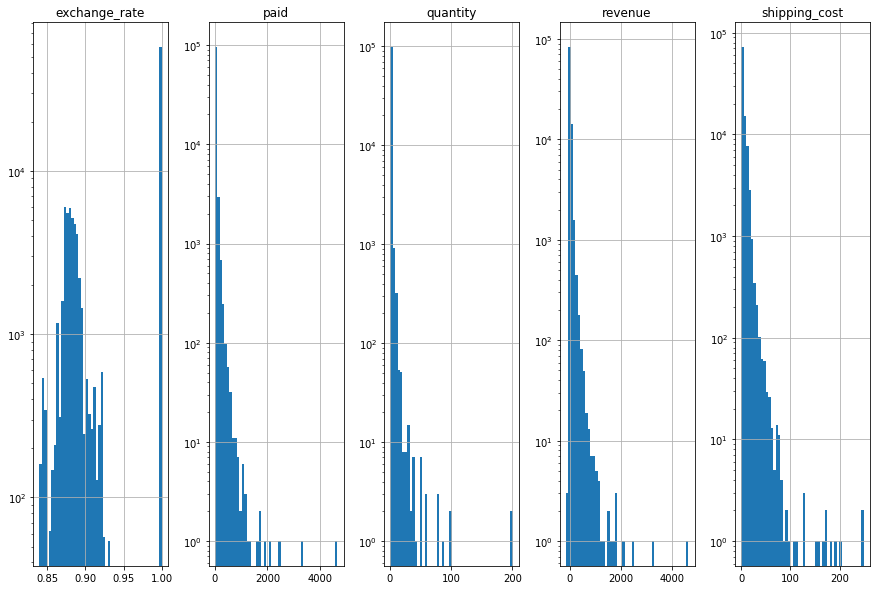

In [5]:
ax = df[["quantity", "paid", "shipping_cost", "exchange_rate", "revenue"]].hist(figsize=(15, 10), layout=(1, 5), bins=50)
for axis in ax[0]: axis.set_yscale("log")

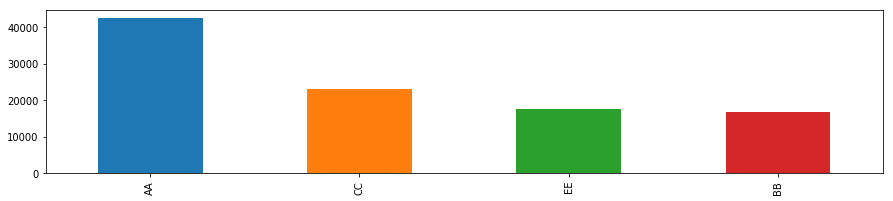

In [6]:
df["planet_code"].value_counts().plot(kind="bar", figsize=(15, 3))

Total number of companies 7008


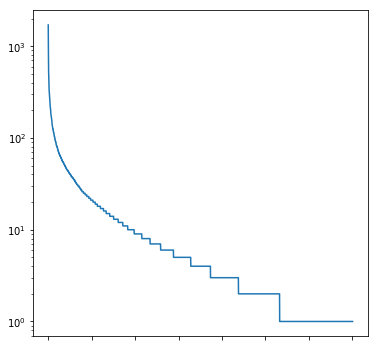

In [7]:
companies = df["company_name"].value_counts()
companies.plot(figsize=(6, 6), logy=True)
print(f"Total number of companies {companies.shape[0]}")

Total number of categories 12482


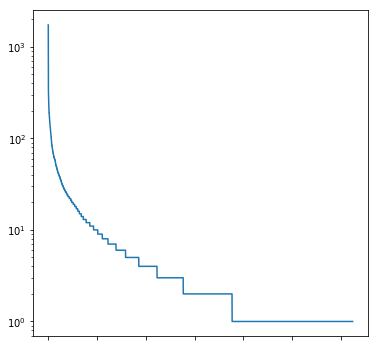

In [8]:
categories = df["category_id"].value_counts()
categories.plot(figsize=(6, 6), logy=True)
print(f"Total number of categories {categories.shape[0]}")

In [9]:
df["revenue: mean 14 days"] =  df["revenue"].rolling(14).mean()
df["revenue: upper"] = df["revenue: mean 14 days"] + 2 * df["revenue"].rolling(14).std()
df["revenue: lower"] = df["revenue: mean 14 days"] - 2 * df["revenue"].rolling(14).std()

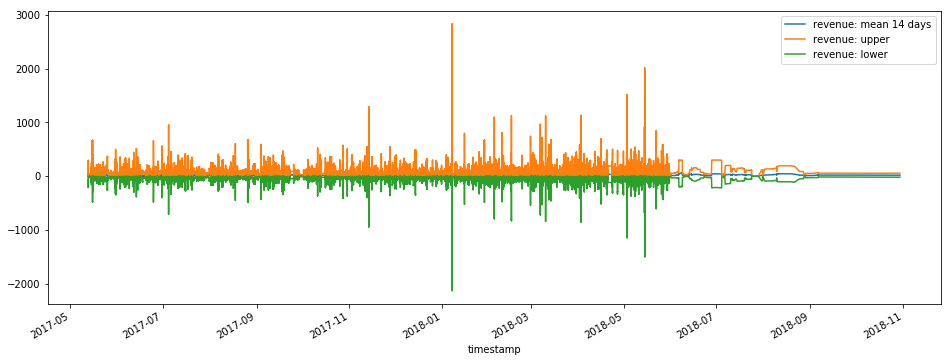

In [10]:
df[["revenue: mean 14 days", "revenue: upper", "revenue: lower"]].plot(figsize=(16, 6), legend=True)

In [16]:
counts = df["company_name"].value_counts()
print(counts.head())
print("The most popular company", counts.idxmax(), "#records", counts.max())

Core Sports         1704
Maze Corporation    1190
Proton Corp          983
Gnomephone           966
Spiderland           860
Name: company_name, dtype: int64
The most popular company Core Sports #records 1704
